<a href="https://colab.research.google.com/github/bjungweapon/mjc.ai.ml/blob/BDU/BDU_10_3_%EB%8B%A4%EC%A4%91%ED%9A%8C%EA%B7%80_%ED%8C%8C%ED%82%A4%EC%8A%A8%EB%B3%91_logistic%EC%82%AC%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 문제 정의
  . 데이터 셋을 이용하여 병을 예측하는 모델을  로지스틱 회귀 모형을 적용하여 생성하고,
   이때 병을 예측하는데 영햐을 미치는 변수를 중요한 순서대로 3개 선정한다.

   . 이 모델에서 파킨슨 병으로 진단하는 기준(threshold, 또는 cutoff)를 0.5로 했을 때와  0.8로 했을 때의 F1-score 를 비교하여 해석할 수 있다.


   분석 조건

   1. 필요없는 컬럼 제거.
   2. 로지스틱 회귀를 위하여 상수항 추가
   3. train 과 test의 비율은 9:1
   4. 모델의 최적화 방법론을  'bfgs' 사용.
   5. 데이터 정규화는 min-max scalier 사용
   6. status는 category type으로 변환
   7. 모델은 로지스틱 회귀 분석 사용
   

1. 데이터 로딩
    - 필요 없는 변수 제거
    

2. 데이터 전처리
   -  training data 와 test data 분리
   -  데이터 정규화 (min-max scaler) , 상수항 추가
   -  독립 변수와 종속 변수의 분리
   -  종속 변수의 카테고리 타입 변환

3. 모델 생성과 변수 설정
   - 모델 적용
   - 모델 탐색

4.  임계치에 따른 모델 정확도 비교
 -  임계치에 따른 1, 0 인토딩 프로그램 생성
 -  임계치에 따라 test set 예측값 생성
 -  f1-sore 생성

In [45]:


from google.colab import drive
drive.mount('/content/drive')

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import f1_score


df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/parkinsons_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
df.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


## 각각의 변수가 의미하는 것을 잘 모른다. 그러나 data model을 생성 한 후 학습을 하면 예측을 할 수 있다.

종속 변수는 무엇이 되어야 하는가 ?

병이냐 ? 아니냐? 를 나타내는  status  가 된다  ( 1 이면 병, 0 이면 아님)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

[I] 첫번째로 SVC algo를 써서 분석해 보자.


In [48]:
X=df.drop(columns = ['name', 'status'], axis=1)
y=df['status']

In [49]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [50]:
y.head()

,status
0,1
1,1
2,1
3,1
4,1


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit_transform(X_train)
scaler.fit_transform(X_test)



array([[-1.27434768e+00, -7.92100902e-01, -6.42064804e-01,
        -3.70550081e-02,  7.65593976e-01, -5.36663194e-02,
         2.70521702e-01, -5.17113412e-02, -1.73362776e-01,
        -1.84537779e-01, -2.46162360e-01, -9.53432617e-02,
         3.51764171e-02, -2.46253875e-01, -2.42578071e-01,
        -5.71526263e-01,  1.17904437e+00,  1.05108661e+00,
         5.45105104e-01,  2.12053870e+00,  2.20220746e-01,
         6.73407367e-01],
       [-9.93036290e-01, -7.55457877e-01, -6.02839911e-01,
         2.21517439e+00,  2.37519856e+00,  2.52231701e+00,
         1.86180632e+00,  2.52056878e+00,  6.63120841e-01,
         1.31330947e+00,  8.25344625e-01,  4.41243374e-01,
         3.16150237e-01,  8.25821477e-01,  7.63822230e-01,
        -1.17294582e+00,  9.93607948e-01,  1.27956439e+00,
         9.15137942e-01,  4.60066283e-01,  1.91967718e-01,
         1.05151668e+00],
       [-9.59040068e-01, -4.67857304e-01, -5.93333267e-01,
         1.66162458e+00,  1.97279742e+00,  1.61932286e+00,
    

In [52]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train, y_train)


SVC(kernel='linear')

In [53]:
pred_train = model.predict(X_train)

In [54]:
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train, pred_train)
train_acc

0.8717948717948718

In [55]:
pred_test = model.predict(X_test)
test_acc = accuracy_score(y_test, pred_test)
test_acc


0.8717948717948718

In [56]:
y_pred = model.predict(X_test)


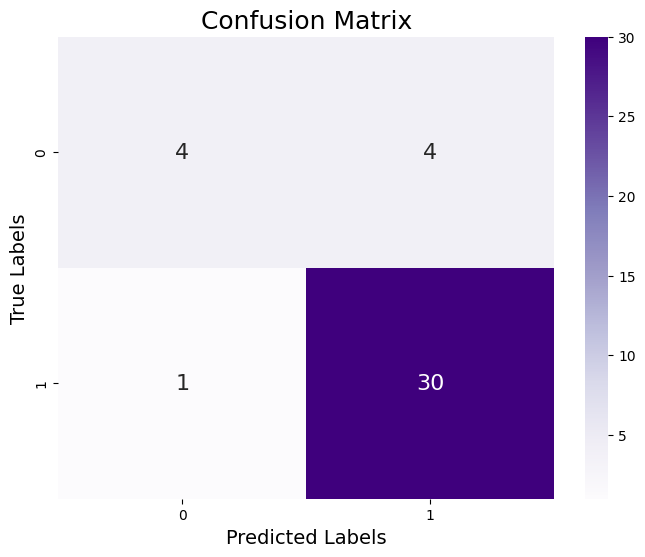

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Purples', fmt='d', annot_kws={"size": 16})

plt.title('Confusion Matrix', fontsize = 18)
plt.xlabel('Predicted Labels', fontsize = 14)
plt.ylabel('True Labels', fontsize = 14)
plt.show()



In [58]:


# Building a Predictive Model
input_data = (122.4,148.65,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.33559,2.486855,0.368674)

input_array = np.asarray(input_data)

reshaped_data = input_array.reshape(1,-1)

std_data = scaler.transform(reshaped_data)

prediction = model.predict(std_data)

if (prediction[0] == 0):
  print('The Person does not have Parkinsons Disease')

else:
  print('The Person has Parkinsons')



The Person has Parkinsons


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(




[II] Logistic 회귀 분석


In [59]:
###  결측치 제거
df_pp = df.drop(["name"], axis = 1, inplace = False)   ## 원본을 유지하면서 새로운 변수로 저장 시킴
df_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

2. 데이터 전처리 하자.

In [60]:
from sklearn import preprocessing # import the preprocessing module

## Normalization

dat_processing_norm = preprocessing.minmax_scale(df_pp) # Now preprocessing is defined and can be used
df_norm = pd.DataFrame(dat_processing_norm)
df_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.184308,0.112592,0.054815,0.195680,0.249012,0.145472,0.247588,0.145288,0.312215,0.280197,...,0.332584,0.068307,0.511745,1.0,0.369155,0.960148,0.569875,0.585765,0.390661,0.497310
1,0.198327,0.094930,0.278323,0.254130,0.288538,0.191233,0.323687,0.191042,0.472887,0.444536,...,0.516048,0.059331,0.432577,1.0,0.470830,0.977024,0.703277,0.741337,0.473145,0.671326
2,0.165039,0.059128,0.265288,0.280178,0.328063,0.229287,0.369239,0.229411,0.390634,0.326212,...,0.443317,0.039596,0.496220,1.0,0.404416,1.000000,0.636745,0.686371,0.408819,0.596682
3,0.165004,0.072927,0.264200,0.263342,0.328063,0.209056,0.324759,0.208862,0.414278,0.354971,...,0.475478,0.040997,0.495936,1.0,0.416255,0.975885,0.695627,0.738089,0.436977,0.671949
4,0.161150,0.080909,0.260107,0.354511,0.407115,0.282755,0.437299,0.282870,0.499452,0.410025,...,0.584542,0.054174,0.455499,1.0,0.375159,0.992813,0.762472,0.513798,0.404336,0.757611


In [61]:
## 상수항 (절편) 추가: sm.add_constant
## statsmodels.api의 add_constant()함수 사용
## 회귀 분석 모형 수식을 간단하게 만들기 위해 상수항을 독립변수 데이터에 추가하는 것을 상수형 결합이라고 한다.

df_pp = sm.add_constant(df_pp, has_constant = "add")
df_pp.head(10)

,const,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,1.0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,1.0,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,1.0,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,1.0,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,1.0,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,1.0,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,1.0,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,1.0,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,1.0,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,1.0,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


원본과 비교해 볼 때, const 열이 새로 추가된 것을 알 수 있따.

In [62]:
## 데이터 프레임의 columns . differnce를 이용하여 status만 제외한 컬럼을 리턴
## 나머지 satus만으로 종속 변수 y의 data frame을 생성하되, status 는 astype 이용하여 category변

In [63]:
feature_columns = list(df_pp.columns.difference(["status"]))
x = df_pp[feature_columns]
y=df_pp['status'].astype('category')

In [64]:
df_pp

,const,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,1.0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,1.0,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,1.0,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,1.0,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,1.0,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,1.0,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,1.0,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,1.0,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,1.0,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [67]:
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y, test_size=0.1, random_state=2022)

In [69]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((175, 22), (20, 22), (175,), (20,))



3. 모델 생성과 변수 선정

In [70]:
model = sm.Logit(train_y, train_x)
result = model.fit(method='bfgs', maxiter = 1000)   ## 파라미터 최적화
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.227111
         Iterations: 287
         Function evaluations: 293
         Gradient evaluations: 293
                           Logit Regression Results                           
Dep. Variable:                 status   No. Observations:                  175
Model:                          Logit   Df Residuals:                      153
Method:                           MLE   Df Model:                           21
Date:                Sat, 12 Apr 2025   Pseudo R-squ.:                  0.5927
Time:                        06:32:19   Log-Likelihood:                -39.744
converged:                       True   LL-Null:                       -97.576
Covariance Type:            nonrobust   LLR p-value:                 4.431e-15
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
MDVP:Fo(Hz)          0.

각각의 값에 대한 coef, std err, z, 등등 파라미터 값을 보여준다.
정확도에 대한 값이다.

P > |z| 이 작을 수록 종속 변수에 영향을 주는 ...

4. 임계치에 대한 모델 정확도 비교

In [79]:
## 임계치에 따라 예측된 확률값 1 또는 0 으로 분할하는 함수

def cut_off(y, threshold) :
  Y = y.copy()
  Y[Y>threshold]= 1
  Y[Y<=threshold]=0

  return (Y.astype(int))


In [73]:
## predict()함수를 이용하여 테스트 셋에 대한 예측 확률을 산출하고 임계치 적용

In [81]:
test_y_pred_prob = result.predict(test_x)
test_y_pred = cut_off(test_y_pred_prob, 0.8)

In [82]:
f1_score(test_y, test_y_pred)

0.8